In [44]:
#import dependencies 
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

#stock analysis virtual environment, attributed by Stefanie Molin and licensed by MIT creative common
import stock_analysis 

In [58]:
reader = stock_analysis.StockReader('2010-06-01', '2018-01-01')

# get stock data
pmt, o, vti = (
    reader.get_ticker_data(ticker) \
    for ticker in ['o', 'pmt', 'vti'])

# get NASDAQ data
nye = reader.get_index_data('NASDAQ')

In [59]:
vti

,open,high,low,close,adj_close,volume
date,,,,,,
2010-06-01,55.430000,56.279999,54.869999,54.930000,43.340469,1900000
2010-06-02,55.250000,56.380001,54.990002,56.360001,44.468750,2962200
2010-06-03,56.529999,56.799999,56.049999,56.660000,44.705460,1943500
2010-06-04,55.549999,55.930000,54.410000,54.669998,43.135323,1940100
2010-06-07,54.779999,54.980000,53.759998,53.779999,42.433102,1880200
...,...,...,...,...,...,...
2017-12-22,137.639999,137.860001,137.190002,137.520004,126.327499,1926000
2017-12-26,137.339996,137.520004,137.289993,137.410004,126.226486,2051300
2017-12-27,137.580002,137.720001,137.339996,137.460007,126.272408,2242400


In [62]:
from stock_analysis.utils import group_stocks, describe_group

stocks = group_stocks(
    {'Pennymac Mortgage Trust':pmt,
     'Realty Income Corp': o
     }
)

stocks_nasdaq = group_stocks(
    {'Pennymac Mortgage Trust':pmt,
     'Realty Income Corp': o,
    'VTI' : vti
    }
)

stocks_nasdaq

,adj_close,close,high,low,name,open,volume
date,,,,,,,
2010-06-01,16.597946,29.593023,30.300388,29.515505,Pennymac Mortgage Trust,30.048450,684835
2010-06-02,17.054470,30.406977,30.406977,29.428295,Pennymac Mortgage Trust,29.835272,686074
2010-06-03,16.929464,30.184109,30.687984,29.970930,Pennymac Mortgage Trust,30.687984,362954
2010-06-04,16.087065,28.682171,29.970930,28.585272,Pennymac Mortgage Trust,29.815891,1164818
2010-06-07,16.135975,28.769381,29.428295,28.585272,Pennymac Mortgage Trust,28.701550,498559
...,...,...,...,...,...,...,...
2017-12-22,126.327499,137.520004,137.860001,137.190002,VTI,137.639999,1926000
2017-12-26,126.226486,137.410004,137.520004,137.289993,VTI,137.339996,2051300
2017-12-27,126.272408,137.460007,137.720001,137.339996,VTI,137.580002,2242400


In [64]:
pmt_viz = stock_analysis.StockVisualizer(pmt)
o_viz = stock_analysis.StockVisualizer(o)
group_viz = stock_analysis.AssetGroupAnalyzer(stocks_nasdaq)

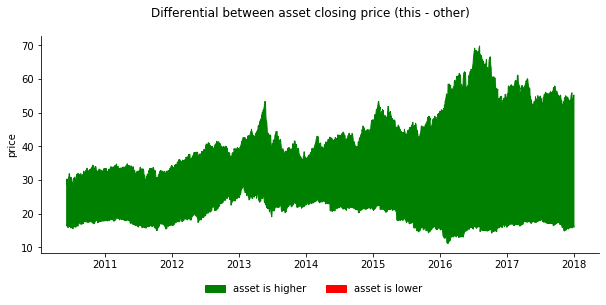

In [74]:
pmt_viz.fill_between_other(o)
plt.savefig("nasdaq_data/Q8_1.png")

## Question 5: Is there a strong or weak correlation to the stock market?

The correlation between the NASDAQ and PMT is 0.83


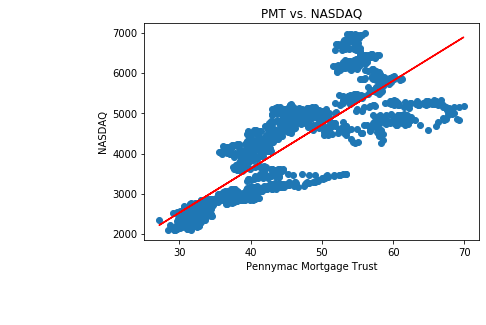

In [77]:
# Linear regression on PMT
x_values = pmt['close']
y_values = nye['close']

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between the NASDAQ and PMT is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Pennymac Mortgage Trust')
plt.ylabel('NASDAQ')
plt.title('PMT vs. NASDAQ')
plt.savefig("nasdaq_data/Q4_O.png")
plt.show()


The correlation between the NASDAQ and PMT is -0.25


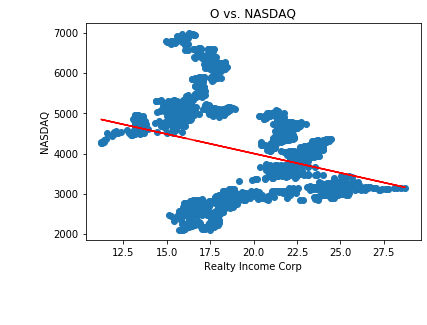

In [66]:
# Linear regression on Realty Income Corp

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

x_values = o['close']
y_values = nye['close']

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between the NASDAQ and PMT is {round(correlation[0],2)}")

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Realty Income Corp')
plt.ylabel('NASDAQ')
plt.title('O vs. NASDAQ')
plt.savefig("nasdaq_data/Q4_1.png")
plt.show()


## Question 4: How do these stocks compare to an index fund

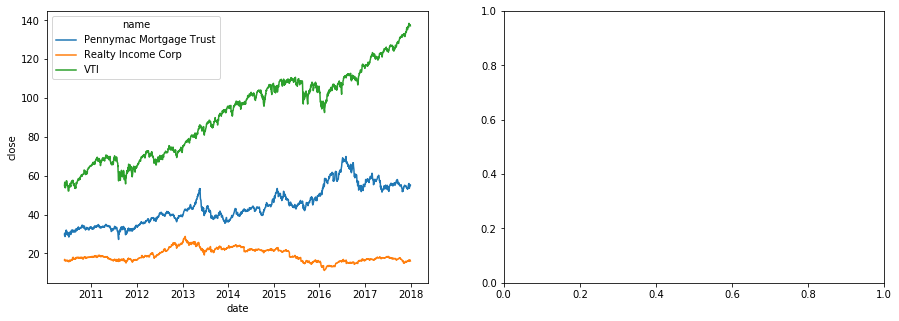

In [73]:
group_viz = stock_analysis.AssetGroupVisualizer(stocks_nasdaq)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
group_viz.evolution_over_time('close', ax=axes[0])
# pmt_viz.evolution_over_time('close', ax=axes[1], label='PMT')
# o_viz.evolution_over_time('close', ax=axes[0], label = 'O')
plt.savefig("nasdaq_data/Q8_0.png")


In [10]:
# (Pennymac Mortgage Trust) 
pmt_df = pd.read_csv("nasdaq_data/Pennymac_Mortgage_Trust.CSV")
pmt_df['Date']= pd.to_datetime(pmt_df['Date'], format = '%Y-%m-%d')

# filtered by date: June 1 2010 to jan 1, 2018 (this is when first dividend cycle lines up )
filtered_pmt_df = pmt_df.loc[(pmt_df["Date"] >= '2010-06-01')& (pmt_df["Date"] < '2018-01-01')]

# Reset the index 
filtered_pmt_df = filtered_pmt_df.set_index('Date')
filtered_pmt_df

FileNotFoundError: [Errno 2] File nasdaq_data/Pennymac_Mortgage_Trust.CSV does not exist: 'nasdaq_data/Pennymac_Mortgage_Trust.CSV'

In [ ]:
#dataframe for the dividend returns
dividend_pmt_df = filtered_pmt_df.loc[(filtered_pmt_df["Ex-Dividend"] > 0)]
dividend_pmt_df

In [ ]:
#(Reality Income Corp)
O_df = pd.read_csv("nasdaq_data/Realty_Income_Corp.CSV")
O_df['Date']= pd.to_datetime(O_df['Date'], format = '%Y-%m-%d')

# jan 2009 to jan 2018 
filtered_O_df = O_df.loc[(O_df["Date"] >= '2010-06-01')& (O_df["Date"] < '2018-01-01')]

# Reset the index
filtered_O_df = filtered_O_df.set_index('Date')
filtered_O_df

In [ ]:
#dataframe for the divident returns 

dividend_O_df = filtered_O_df.loc[(filtered_O_df["Ex-Dividend"] > 0)]
dividend_O_df

In [ ]:
#target csv
## this df still needs to be filtered by NYA
stock_exchange = 'nasdaq_data/market_index_data_version1.csv'
stock_exchange_df = pd.read_csv(stock_exchange)

#formatting date to align
stock_exchange_df['Date']= pd.to_datetime(stock_exchange_df['Date'], yearfirst=True)

# filtered by dates jan 2009 to jan 2018
filtered_stock_exchange_df = stock_exchange_df.loc[(stock_exchange_df["Date"] >= '2010-06-01')& (stock_exchange_df["Date"] < '2018-01-01')]

# Reset the index
filtered_stock_exchange_df = filtered_stock_exchange_df.set_index('Date')
filtered_stock_exchange_df


,Index,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2009-01-05,NYA,5915.720215,5963.700195,5839.919922,5908.430176,5908.430176,5.413910e+09
2009-01-06,NYA,5908.390137,6014.000000,5901.509766,5968.839844,5968.839844,5.392620e+09
2009-01-07,NYA,5968.839844,5968.839844,5770.240234,5799.049805,5799.049805,4.704940e+09
2009-01-08,NYA,5799.049805,5839.490234,5741.890137,5837.140137,5837.140137,4.991550e+09
2009-01-09,NYA,5838.569824,5842.060059,5691.709961,5702.370117,5702.370117,4.716500e+09
...,...,...,...,...,...,...,...
2017-12-21,N100,1036.010010,1044.699951,1033.890015,1043.829956,1043.829956,1.614066e+08
2017-12-22,N100,1041.569946,1044.349976,1039.160034,1041.040039,1041.040039,1.061892e+08
2017-12-27,N100,1040.310059,1044.790039,1038.680054,1042.000000,1042.000000,9.316470e+07


In [ ]:
# Narrow the global market df to just the NYSE (NYA)
nya_df = filtered_stock_exchange_df.loc[filtered_stock_exchange_df['Index'] == 'NYA']
nya_df

,Index,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2009-01-05,NYA,5915.720215,5963.700195,5839.919922,5908.430176,5908.430176,5.413910e+09
2009-01-06,NYA,5908.390137,6014.000000,5901.509766,5968.839844,5968.839844,5.392620e+09
2009-01-07,NYA,5968.839844,5968.839844,5770.240234,5799.049805,5799.049805,4.704940e+09
2009-01-08,NYA,5799.049805,5839.490234,5741.890137,5837.140137,5837.140137,4.991550e+09
2009-01-09,NYA,5838.569824,5842.060059,5691.709961,5702.370117,5702.370117,4.716500e+09
...,...,...,...,...,...,...,...
2017-12-22,NYA,12803.980470,12807.500000,12773.820310,12797.440430,12797.440430,2.399830e+09
2017-12-26,NYA,12794.129880,12819.570310,12794.129880,12808.900390,12808.900390,1.968780e+09
2017-12-27,NYA,12808.900390,12834.549810,12808.360350,12821.990230,12821.990230,2.202080e+09


In [ ]:
# Line plot: Daily Stock Market Value
x_axis = nya_df.index
y_axis = nya_df.loc[nya_df['Close']]
market_trend, = plt.plot(x_axis, y_axis, marker="o",color="green", linewidth=1, label="Nasdaq Value") 
# plt.savefig("../Images/lineConfig.png")
plt.show()

KeyError: "None of [Float64Index([       5908.430176,        5968.839844,        5799.049805,\n               5837.140136999999,        5702.370117,        5551.029785,\n                     5538.839844,        5328.680176,            5347.75,\n                          5387.5,\n              ...\n                     12699.67969,        12785.82031,        12747.54004,\n              12747.549809999999,        12800.20996,        12797.44043,\n                     12808.90039,        12821.99023,        12853.08984,\n                     12808.83984],\n             dtype='float64', name='Date', length=2264)] are in the [index]"

In [ ]:
# PMT stock value over our time period 

pmt_x_values = pmt_df['Date']
pmt_y_values = pmt_df['Close']

plt.plot(x_axis, y_axis, marker="o",color="green", linewidth=1, label="Nasdaq Value") 

plt.xlabel('Year')
plt.ylabel('PMT stock value')
plt.show()

In [ ]:
pmt_x_values = dividend_pmt_df['Date']
pmt_y_values = dividend_pmt_df['Ex-Dividend']


scatter_plot = plt.scatter(pmt_x_values, pmt_y_values, marker="o", facecolors="red", edgecolors="black",
             alpha=0.25)

plt.xlabel('Year')
plt.ylabel('PMT Dividend Value')
plt.show()

In [ ]:
O_x_values = O_df['Date']
O_y_values = O_df['Close']


scatter_plot = plt.scatter(O_x_values, O_y_values, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.25)

plt.xlabel('Year')
plt.ylabel('O stock value')
plt.show()

In [ ]:
O_x_values = dividend_O_df['Date']
O_y_values = dividend_O_df['Ex-Dividend']


scatter_plot = plt.scatter(O_x_values, O_y_values, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.25)

plt.xlabel('Year')
plt.ylabel('O Dividend value')
plt.show()

In [17]:
# scatter plot, pmt vs. nsadaq (plus linear regression?)

#Define X & Y
market_trend = nya_df['Close'].astype(float)
pmt_y_values = filtered_pmt_df['Close'].astype(float)

#optional
# scatter_x_limit = 3200
# scatter_x_axis = []

#Create scatter plot
# scatter_plot = plt.scatter(pmt_y_values, market_trend, marker="o", facecolors="red", edgecolors="black",
#             alpha=0.25)


correlation = st.pearsonr(market_trend, pmt_y_values)
print(f"The correlation between PMT and the tock trend is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(market_trend, pmt_y_values)
regress_values = market_trend * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(market_trend, pmt_y_values)
plt.plot(market_trend,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('New York Stock Exchange')
plt.ylabel('PMT stock value')
plt.title('NYE Vs. PMT')
plt.show()



NameError: name 'filtered_pmt_df' is not defined

In [ ]:
# x_values = city_data_df['Lat']
# y_values = city_data_df['Max Temp']
# plt.scatter(x_values,y_values)

# # Incorporate the other graph properties
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature')
# plt.title('City Latitude vs. Max Temperature')

# # Save the figure
# plt.savefig("output_data/Fig1.png")

# # Show plot
# plt.show()